In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
# Load dataset (make sure the CSV file is in the same folder or give full path)
df = pd.read_csv(r"D:\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Display the first few rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Convert 'Attrition' from Yes/No to 1/0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [5]:
# Define push and inhibit features
push_factors = ['OverTime', 'DistanceFromHome', 'YearsSinceLastPromotion', 'JobInvolvement', 'WorkLifeBalance']
inhibit_factors = ['MonthlyIncome', 'TotalWorkingYears', 'StockOptionLevel', 'YearsAtCompany', 'EnvironmentSatisfaction']

# Combine selected features
selected_features = push_factors + inhibit_factors


In [6]:
# Convert 'OverTime' to 1/0
df['OverTime'] = LabelEncoder().fit_transform(df['OverTime'])

# Drop missing values just in case
df = df.dropna()


In [7]:
# Normalize the selected features
scaler = StandardScaler()
X = scaler.fit_transform(df[selected_features])
y = df['Attrition'].values


In [8]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shape
X_train.shape, X_test.shape


((1176, 10), (294, 10))

In [9]:
model = Sequential([
    Dense(1, input_dim=X_train.shape[1], activation='sigmoid')  # Single neuron with sigmoid activation
])


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# We create a single neuron with sigmoid activation and 10 input features
model = Sequential([
    Dense(1, input_dim=X_train.shape[1], activation='sigmoid')
])

In [11]:
# We use Adam optimizer and binary crossentropy loss because this is a binary classification problem
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
 #We train the model for 100 epochs and use 10% of the training data for validation
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4765 - loss: 0.8801 - val_accuracy: 0.6695 - val_loss: 0.6502
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6698 - loss: 0.6251 - val_accuracy: 0.7881 - val_loss: 0.5316
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8122 - loss: 0.5192 - val_accuracy: 0.7966 - val_loss: 0.4735
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8507 - loss: 0.4470 - val_accuracy: 0.7966 - val_loss: 0.4457
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8416 - loss: 0.4219 - val_accuracy: 0.7881 - val_loss: 0.4314
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8777 - loss: 0.3857 - val_accuracy: 0.7881 - val_loss: 0.4202
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8559 - loss: 0.3863 - val_accuracy: 0.7881 - val_loss: 0.4154
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8769 - loss: 0.3560 - val_accuracy: 0.7966 - 

In [13]:
# Predict the probabilities, convert to class (0 or 1), and calculate test accuracy
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [14]:
print("Test Accuracy:", accuracy_score(y_test, y_pred_classes))

Test Accuracy: 0.8843537414965986


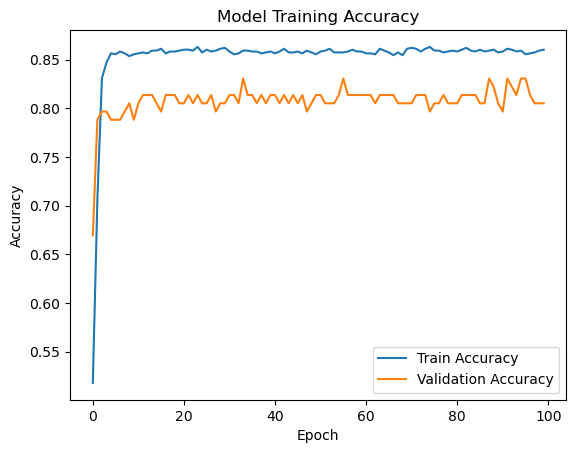

In [15]:
# Cell 13: Visualize training and validation accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Training Accuracy')
plt.legend()
plt.show()


In [16]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype("int32")

# Show sample predictions
for i in range(5):
    print(f"Predicted: {predictions[i][0]}, Actual: {y_test[i]}")


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8488 - loss: 0.3781 
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8534 - loss: 0.3628 
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8510 - loss: 0.3847 
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8502 - loss: 0.3787 
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8575 - loss: 0.3731 
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8547 - loss: 0.3741
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8432 - loss: 0.3747  
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8737 - loss: 0.3273 
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8552 - loss: 0.3470
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8496 - loss: 0.3736
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8605 - loss: 0.3784 
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

In [17]:
# Add some Gaussian noise to test inputs to simulate "noisy sensors"
noise = np.random.normal(0, 0.1, X_test.shape)
X_test_noisy = X_test + noise

# Evaluate model on noisy input
loss_noisy, acc_noisy = model.evaluate(X_test_noisy, y_test)
print(f"Noisy Test Accuracy: {acc_noisy:.2f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8688 - loss: 0.3462 
Noisy Test Accuracy: 0.89


In [18]:
loss_noisy, acc_noisy = model.evaluate(X_test_noisy, y_test)
print(f"Noisy Test Accuracy: {acc_noisy:.2f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8688 - loss: 0.3462 
Noisy Test Accuracy: 0.89


In [19]:
predictions_noisy = model.predict(X_test_noisy)
predictions_noisy = (predictions_noisy > 0.5).astype("int32")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


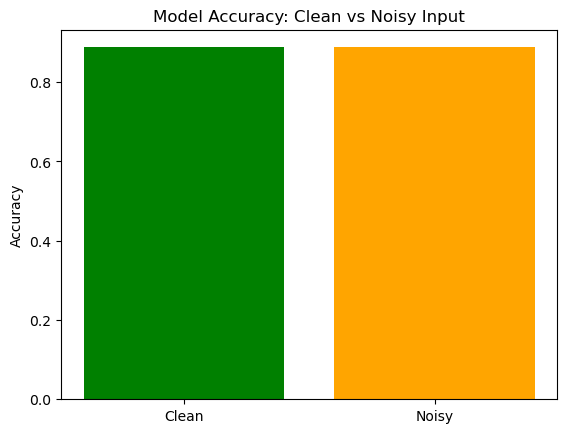

In [20]:
import matplotlib.pyplot as plt

labels = ['Clean', 'Noisy']
accuracies = [accuracy, acc_noisy]

plt.bar(labels, accuracies, color=['green', 'orange'])
plt.title("Model Accuracy: Clean vs Noisy Input")
plt.ylabel("Accuracy")
plt.show()


In [23]:
import joblib

# Save model and scaler
model.save("neuron_model.keras")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']